<a href="https://colab.research.google.com/github/monzia-moodie/HackDiversityDataInterviewChallenge/blob/main/HackDiversityInterviewEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Dataset Overview:

Shape: (10000, 8)

Columns: ['user_id', 'feature_used', 'session_duration', 'engagement_score', 'accessibility_settings', 'age_group', 'gender', 'additional_attributes']

Missing Values:
 user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64

Sample Data:
      user_id        feature_used  session_duration  engagement_score  \
0  user_4737        Multilingual             60.77                 4   
1  user_1492      Text-to-Speech             20.20                 5   
2  user_5936     Colorblind Mode             93.78                 2   
3  user_5519     Colorblind Mode             26.36                 3   
4  user_1853  High Contrast Mode             91.67                 5   

   accessibility_settings     age_group      gender additional_attributes  
0       

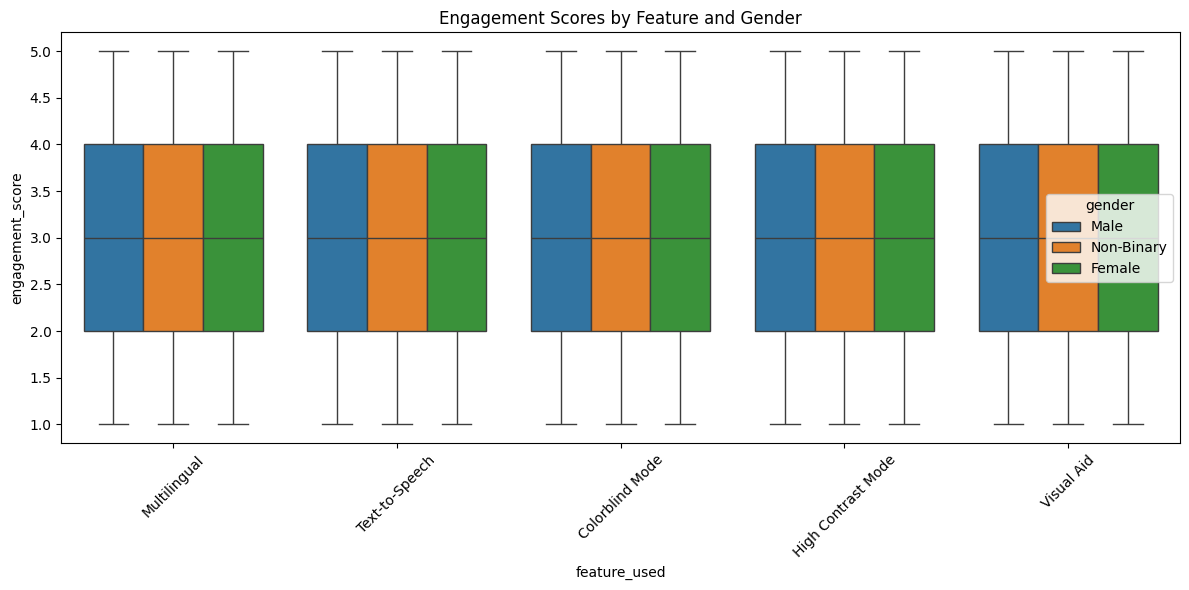

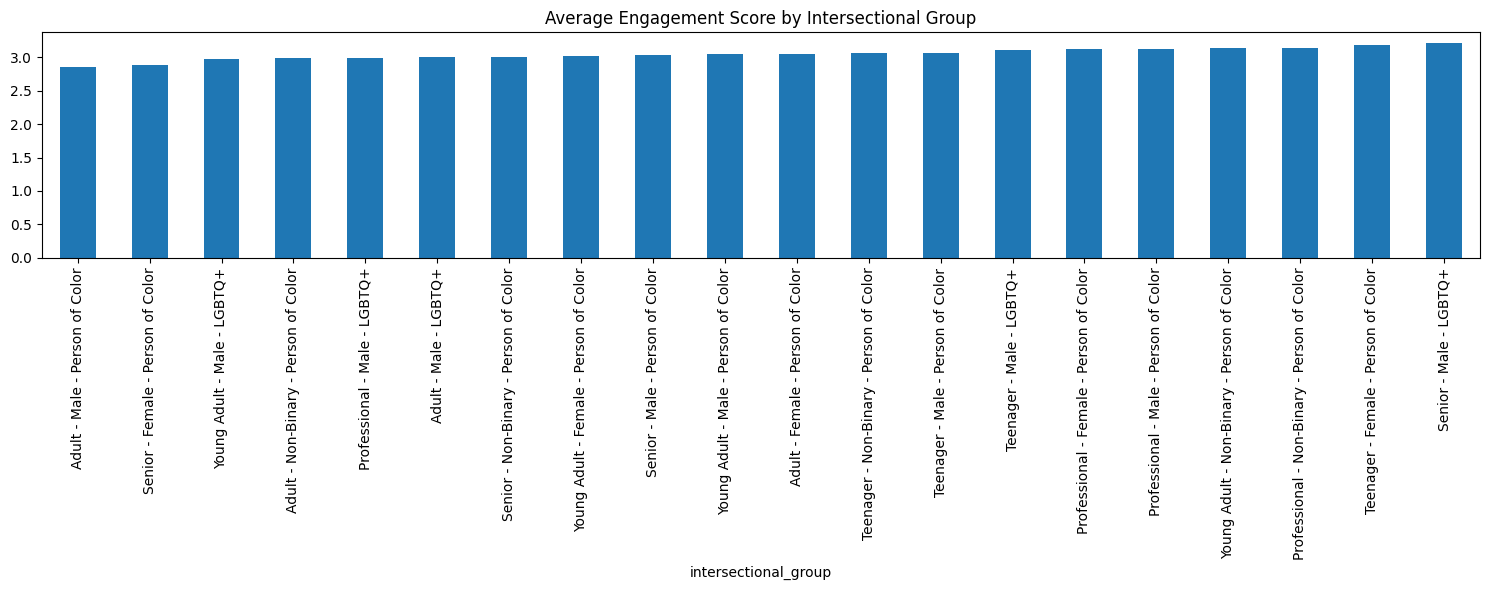


Model Performance:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55      1012
           1       0.49      0.38      0.43       988

    accuracy                           0.50      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.50      0.49      2000



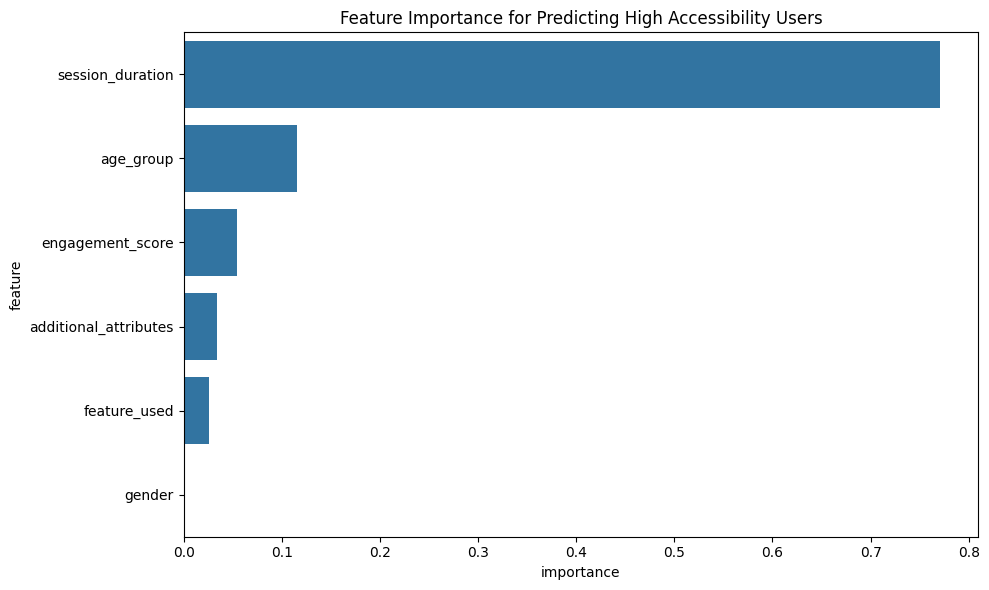


Key Findings:

1. Feature Adoption Patterns:
feature_used
Colorblind Mode       2060
High Contrast Mode    2007
Text-to-Speech        1998
Multilingual          1978
Visual Aid            1957
dtype: int64

2. Top Engaged Demographics:
intersectional_group
Senior - Male - LGBTQ+                         3.211679
Teenager - Female - Person of Color            3.177083
Professional - Non-Binary - Person of Color    3.143590
Young Adult - Non-Binary - Person of Color     3.142145
Professional - Male - Person of Color          3.125604
Name: engagement_score, dtype: float64

3. Accessibility Settings Distribution:
accessibility_settings
0    1687
1    1652
2    1696
3    1662
4    1649
5    1654
Name: count, dtype: int64

Recommendations:

1. Focus on Increasing Engagement for:
intersectional_group
Adult - Male - Person of Color          2.849383
Senior - Female - Person of Color       2.881773
Young Adult - Male - LGBTQ+             2.969388
Adult - Non-Binary - Person of Color    2.98375

In [12]:
analysis = InclusiveDataAnalysis('/content/inclusive_features_usage.csv')
analysis.inspect_data()\
       .clean_data()\
       .analyze_engagement()\
       .engineer_features()\
       .build_predictive_model()\
       .generate_insights()

Dataset Overview:

Shape: (1000, 8)

Columns: ['user_id', 'feature_used', 'session_duration', 'engagement_score', 'accessibility_settings', 'age_group', 'gender', 'additional_attributes']

Missing Values:
 user_id                     0
feature_used                0
session_duration            0
engagement_score            0
accessibility_settings      0
age_group                   0
gender                      0
additional_attributes     305
dtype: int64

Sample Data:
    user_id     feature_used  session_duration  engagement_score  \
0        0       Visual Aid         30.485216                 4   
1        1  Colorblind Mode         21.690499                 3   
2        2       Visual Aid         32.704568                 5   
3        3       Visual Aid         29.497619                 4   
4        4  Colorblind Mode         27.610520                 1   

   accessibility_settings    age_group      gender additional_attributes  
0                       1       Senior      Fema

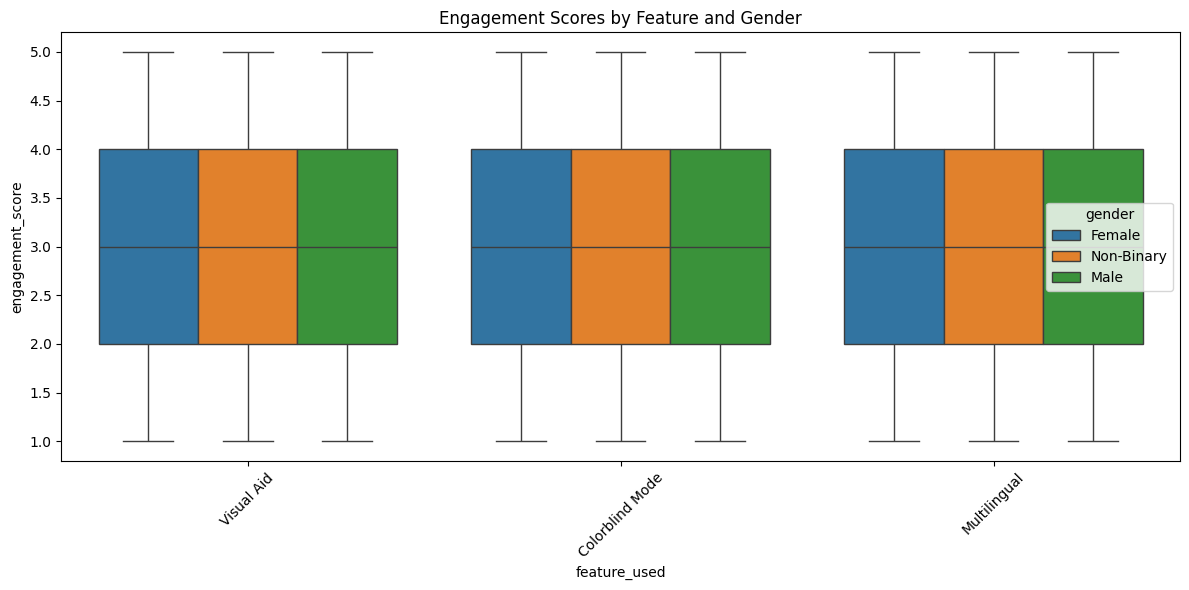

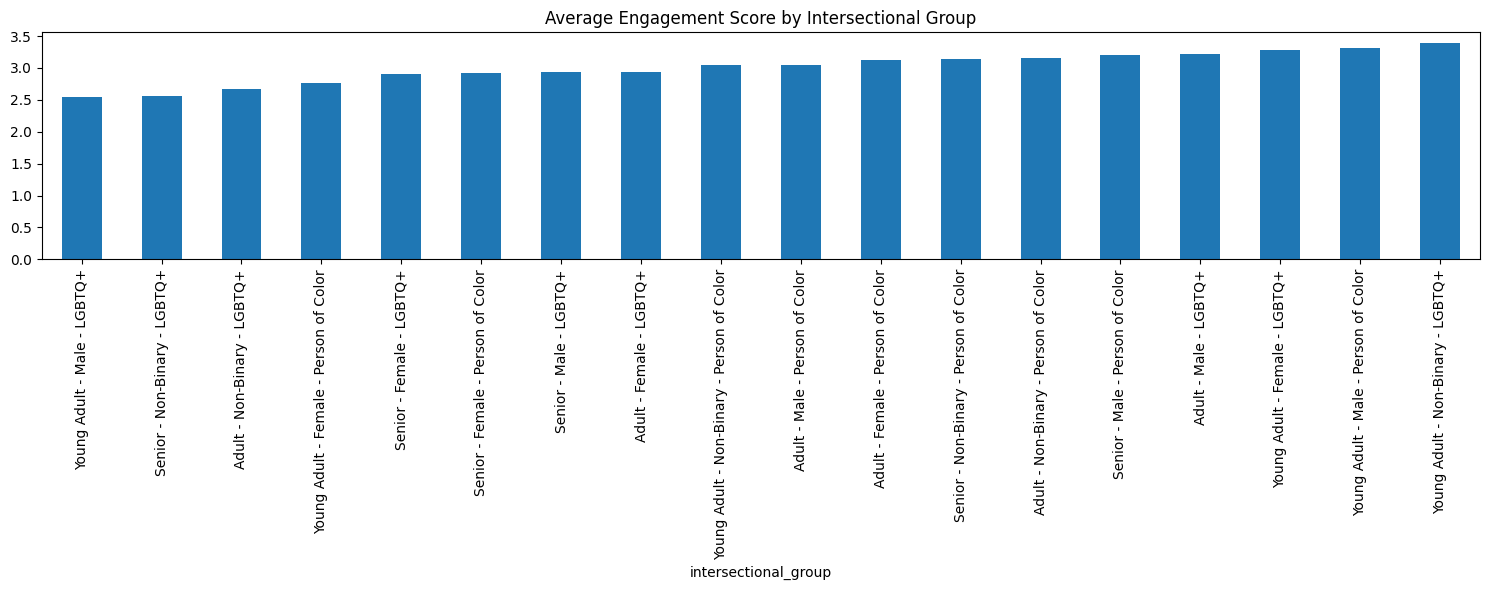


Model Performance:
              precision    recall  f1-score   support

           0       0.52      0.59      0.56       106
           1       0.46      0.38      0.42        94

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



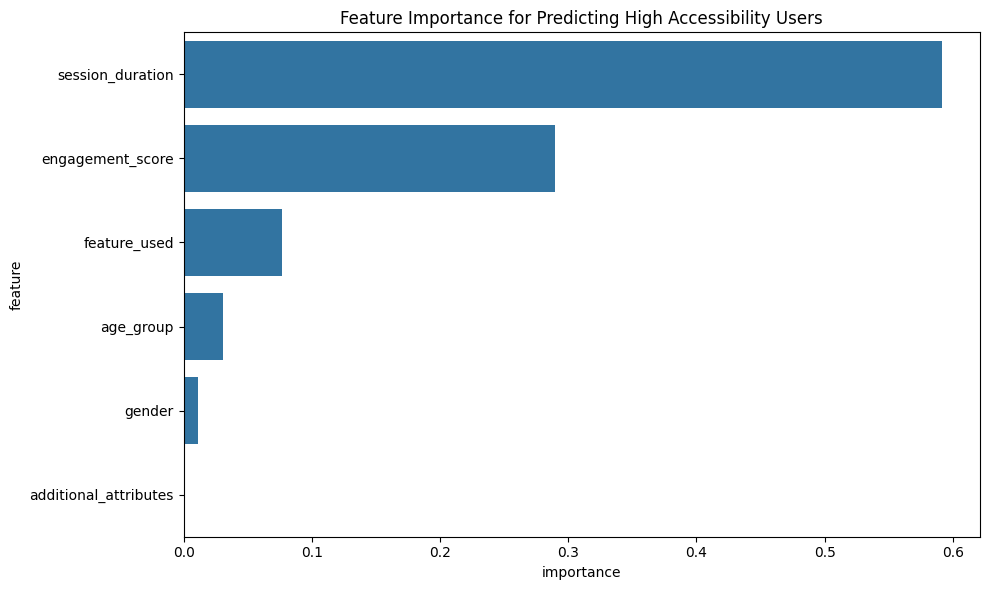


Key Findings:

1. Feature Adoption Patterns:
feature_used
Colorblind Mode    355
Multilingual       326
Visual Aid         319
dtype: int64

2. Top Engaged Demographics:
intersectional_group
Young Adult - Non-Binary - LGBTQ+       3.388889
Young Adult - Male - Person of Color    3.318841
Young Adult - Female - LGBTQ+           3.285714
Adult - Male - LGBTQ+                   3.222222
Senior - Male - Person of Color         3.197183
Name: engagement_score, dtype: float64

3. Accessibility Settings Distribution:
accessibility_settings
0    179
1    165
2    175
3    155
4    166
5    160
Name: count, dtype: int64

Recommendations:

1. Focus on Increasing Engagement for:
intersectional_group
Young Adult - Male - LGBTQ+               2.551724
Senior - Non-Binary - LGBTQ+              2.552632
Adult - Non-Binary - LGBTQ+               2.666667
Young Adult - Female - Person of Color    2.757143
Senior - Female - LGBTQ+                  2.904762
Name: engagement_score, dtype: float64

2. Mos

In [ ]:
class InclusiveDataAnalysis:
    def __init__(self, file_path):
        """Initialize with path to CSV file"""
        self.df = pd.read_csv(file_path)
        self.df_clean = None
        self.features = None
        self.model = None

    def inspect_data(self):
        """Initial data inspection"""
        print("Dataset Overview:")
        print("\nShape:", self.df.shape)
        print("\nColumns:", self.df.columns.tolist())
        print("\nMissing Values:\n", self.df.isnull().sum())
        print("\nSample Data:\n", self.df.head())
        return self

    def clean_data(self):
        """Clean and prepare data with focus on inclusive analysis"""
        df = self.df.copy()

        # Handle missing values
        numeric_cols = ['session_duration', 'engagement_score', 'accessibility_settings']
        for col in numeric_cols:
            # Use median for numeric columns to avoid outlier influence
            if df[col].isnull().sum() > 0:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"Filled {col} missing values with median: {median_val}")

        # Handle categorical missing values
        categorical_cols = ['feature_used', 'age_group', 'gender', 'additional_attributes']
        for col in categorical_cols:
            if df[col].isnull().sum() > 0:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"Filled {col} missing values with mode: {mode_val}")

        # Handle outliers using IQR method
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap outliers at bounds
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

        # Create high_accessibility_user classification
        df['high_accessibility_user'] = (df['accessibility_settings'] >= 3).astype(int)

        # Create intersectional analysis column
        df['intersectional_group'] = df.apply(
            lambda x: f"{x['age_group']} - {x['gender']} - {x['additional_attributes']}",
            axis=1
        )

        self.df_clean = df
        return self

    def analyze_engagement(self):
        """Analyze engagement patterns across demographics"""
        df = self.df_clean

        # Overall engagement statistics
        print("\nEngagement Score Statistics by Demographics:")
        print("\nBy Gender:")
        print(df.groupby('gender')['engagement_score'].describe())

        print("\nBy Age Group:")
        print(df.groupby('age_group')['engagement_score'].describe())

        # Visualize engagement patterns
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='feature_used', y='engagement_score', hue='gender', data=df)
        plt.xticks(rotation=45)
        plt.title('Engagement Scores by Feature and Gender')
        plt.tight_layout()
        plt.show()

        # Intersectional analysis
        plt.figure(figsize=(15, 6))
        engagement_by_intersection = df.groupby('intersectional_group')['engagement_score'].mean().sort_values()
        engagement_by_intersection.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.title('Average Engagement Score by Intersectional Group')
        plt.tight_layout()
        plt.show()

        return self

    def engineer_features(self):
        """Engineer features for analysis"""
        df = self.df_clean

        # Average session duration per feature
        feature_duration = df.groupby('feature_used')['session_duration'].mean()
        df['avg_feature_duration'] = df['feature_used'].map(feature_duration)

        # Average engagement by demographics
        engagement_by_age = df.groupby('age_group')['engagement_score'].mean()
        df['avg_age_engagement'] = df['age_group'].map(engagement_by_age)

        engagement_by_gender = df.groupby('gender')['engagement_score'].mean()
        df['avg_gender_engagement'] = df['gender'].map(engagement_by_gender)

        # Feature usage frequency
        feature_frequency = df['feature_used'].value_counts(normalize=True)
        df['feature_popularity'] = df['feature_used'].map(feature_frequency)

        self.features = df
        return self

    def build_predictive_model(self):
        """Build and evaluate predictive model"""
        df = self.features

        # Prepare features for modeling
        categorical_cols = ['age_group', 'gender', 'additional_attributes', 'feature_used']
        le = LabelEncoder()

        X = df[categorical_cols + ['engagement_score', 'session_duration']].copy()
        for col in categorical_cols:
            X[col] = le.fit_transform(X[col])

        y = df['high_accessibility_user']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train model
        model = DecisionTreeClassifier(max_depth=5, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate model
        y_pred = model.predict(X_test)
        print("\nModel Performance:")
        print(classification_report(y_test, y_pred))

        # Feature importance
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=importance_df)
        plt.title('Feature Importance for Predicting High Accessibility Users')
        plt.tight_layout()
        plt.show()

        self.model = model
        return self

    def generate_insights(self):
        """Generate insights and recommendations"""
        df = self.features

        print("\nKey Findings:")

        # Feature adoption patterns
        print("\n1. Feature Adoption Patterns:")
        feature_adoption = df.groupby('feature_used').size().sort_values(ascending=False)
        print(feature_adoption)

        # Engagement by demographic
        print("\n2. Top Engaged Demographics:")
        top_engaged = df.groupby('intersectional_group')['engagement_score'].mean().sort_values(ascending=False).head()
        print(top_engaged)

        # Accessibility patterns
        print("\n3. Accessibility Settings Distribution:")
        access_dist = df['accessibility_settings'].value_counts().sort_index()
        print(access_dist)

        print("\nRecommendations:")

        # Identify underserved groups
        low_engagement = df.groupby('intersectional_group')['engagement_score'].mean().sort_values().head()
        print("\n1. Focus on Increasing Engagement for:")
        print(low_engagement)

        # Popular features by demographic
        print("\n2. Most Popular Features by Demographics:")
        demo_features = df.groupby(['age_group', 'feature_used'])['engagement_score'].mean().unstack()
        print(demo_features.idxmax(axis=1))

        return self

# Example usage
if __name__ == "__main__":
    # Create sample data
    np.random.seed(42)
    n_samples = 1000

    sample_data = pd.DataFrame({
        'user_id': range(n_samples),
        'feature_used': np.random.choice(['Colorblind Mode', 'Multilingual', 'Visual Aid'], n_samples),
        'session_duration': np.random.normal(30, 10, n_samples),
        'engagement_score': np.random.randint(1, 6, n_samples),
        'accessibility_settings': np.random.randint(0, 6, n_samples),
        'age_group': np.random.choice(['Young Adult', 'Adult', 'Senior'], n_samples),
        'gender': np.random.choice(['Male', 'Female', 'Non-Binary'], n_samples),
        'additional_attributes': np.random.choice(['LGBTQ+', 'Person of Color', 'None'], n_samples)
    })

    # Save sample data
    sample_data.to_csv('sample_inclusive_data.csv', index=False)

    # Run analysis
    analysis = InclusiveDataAnalysis('sample_inclusive_data.csv')
    analysis.inspect_data()\
           .clean_data()\
           .analyze_engagement()\
           .engineer_features()\
           .build_predictive_model()\
           .generate_insights()